**Imports**

In [1]:
from ctypes import cast, POINTER
from comtypes import CLSCTX_ALL
from pycaw.pycaw import AudioUtilities, IAudioEndpointVolume
import math
import pyautogui
from playsound import playsound
import os
import sounddevice as sd
import soundfile as sf
import vlc
import time
import os
from tkinter import *
import subprocess
import sys
import tensorflow as tf
import cv2
import numpy as np

**Volume UP**

In [2]:
def increaseVolume():
    devices = AudioUtilities.GetSpeakers()
    interface = devices.Activate(IAudioEndpointVolume._iid_, CLSCTX_ALL, None)
    volume = cast(interface, POINTER(IAudioEndpointVolume))

    currentVolumeDb = volume.GetMasterVolumeLevel()
    volume.SetMasterVolumeLevel(currentVolumeDb + 6.0, None)


**Volume DOWN**

In [3]:
def decreaseVolume():
    devices = AudioUtilities.GetSpeakers()
    interface = devices.Activate(IAudioEndpointVolume._iid_, CLSCTX_ALL, None)
    volume = cast(interface, POINTER(IAudioEndpointVolume))

    currentVolumeDb = volume.GetMasterVolumeLevel()
    volume.SetMasterVolumeLevel(currentVolumeDb - 6.0, None)


**Take an SS**

In [4]:
def takeSS():
    myScreenshot = pyautogui.screenshot()
    myScreenshot.save(r'Photo/saved_ss.png')


**Play a song**

In [5]:
def playMusic():

    os.add_dll_directory(r'C:/Program Files (x86)/VideoLAN')

    p = vlc.MediaPlayer(
        "E:/Downloads/MLSessions-main/MLSessions-main/MLSession_20_09_2021_CNN/Scam-1992-Ringtone.mp3"
    )
    p.play()
    time.sleep(60)
    p.stop()

**HELP**

In [6]:
def showHelpMenu():
    path = 'HELP.pdf'
    os.system(path)


**Record a sound**

In [7]:
def Voice_rec():
    fs = 48000
    myrecording = sd.rec(int(10 * fs), samplerate=fs, channels=2)
    sd.wait()
    return sf.write('Voice_Recording.flac', myrecording, fs)


def recordSound():
    master = Tk()
    Label(master, text=" Voice Recoder : ").grid(row=0, sticky=W, rowspan=5)
    b = Button(master, text="Start", command=Voice_rec)
    b.grid(row=0, column=2, columnspan=2, rowspan=2, padx=5, pady=5)
    mainloop()


**Launch File Explorer**

In [8]:
def launchFileExplorer():
    path = r'C:/Program Files (x86)/IronPython 2.7/Lib'
    sys.path.append(path)
    subprocess.Popen('explorer "C:/"')


**Function Call**

In [22]:
cam = cv2.VideoCapture(0)

cv2.namedWindow("test")

img_counter = 0

while True:
    ret, frame = cam.read()
    if not ret:
        print("failed to grab frame")
        break
    cv2.imshow("test", frame)

    k = cv2.waitKey(1)
    if k % 256 == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break
    elif k % 256 == 32:
        # SPACE pressed
        img_name = "opencv_frame.png"
        cv2.imwrite(img_name, frame)
        print("{} written!".format(img_name))
        img_counter += 1

cam.release()

cv2.destroyAllWindows()

opencv_frame.png written!
opencv_frame.png written!
Escape hit, closing...


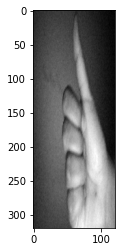

Predicted Class:  8
None of the options match! Pls try again.


In [23]:
export_dir = "Model_Hand_Gestures"
new_model = tf.keras.models.load_model(export_dir)

import matplotlib.pyplot as plt
def predictClass(img_path: str) -> int:
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (120, 320))
    plt.imshow(img,cmap='gray')
    plt.show()
    img = img[np.newaxis, :, :, np.newaxis]
    predicted_class = list(new_model.predict(img)[0])
    # print(predicted_class)
    return predicted_class.index(max(predicted_class)) + 1
    


def automateTask(class_no):
    if class_no == 1:
        launchFileExplorer()
    elif class_no == 2:
        showHelpMenu()
    elif class_no == 3:
        takeSS()
    elif class_no == 4:
        recordSound()
    elif class_no == 5:
        increaseVolume()
    elif class_no == 6:
        playMusic()
    elif class_no == 7:
        decreaseVolume()
    else:
        print("None of the options match! Pls try again.")


class_predicted = predictClass("opencv_frame.png")
print("Predicted Class: ", class_predicted)
automateTask(class_predicted)